### Формулировка задачи:

Перед нами три двери. Вы выбираете первую дверь. Ведущий знает, где машина и выбирает 3 дверь, за которой машины нет. Стоит ли вам изменить свой выбор? (Без потери общности номера дверей могут быть любыми)

---
**Т. Байеса:   P(A|B) = P(B|A) * P(A) / P(B)**

---

Пусть
- A1, A2, A3 - события при которых машина за 1, 2 или 3 дверью
- B - ведущий открывает 3 дверь

P(A1) = P(A2) = P(A3) = 1/3 (изначально выбор двери равновероятен)

---
*Допустим, мы изменили свой выбор и выбрали 2 дверь, тогда*

**P(A2|B) = P(B|A2) * P(A2) / P(B)** - вероятность, что за ней автомобиль
- P(A2) = 1/3
- P(B|A2) = 1 (т.к. ведущий не может выбирать вашу дверь и ту, за которой автомобиль. Остается только 3 дверь)
- P(B) = P(B|A1) * P(A1) + P(B|A2) * P(A2) + P(B|A3) * P(A3) =

        = 1/2 * 1/3 + 1 * 1/3 + 0 * 1/3 = 1/2
**P(A2|B) = 1 * 1/3 / (1/2) = 2/3** вероятность выиграть, сменив дверь

Аналогично, если не менять свой выбор, вероятность выигрыша будет 1/3

### Смоделируем данную ситуацию

In [6]:
import random

def monty_hall(n=100):
    results = {"keep": 0, "change": 0}
    
    for _ in range(n):
        doors = [0, 0, 1]  # 1 машина, 0 пустые двери
        random.shuffle(doors)
        
        choice = random.randrange(3)  # игрок выбрает дверь
        
        # Ведущий открывает пустую дверь, которая не выбрана игроком
        possible_doors = [i for i in range(3) if i != choice and doors[i] == 0]
        opened = random.choice(possible_doors)
        
        # Если игрок оставляет выбор
        if doors[choice] == 1:
            results["keep"] += 1
        
        # Если игрок меняет свой выбор
        other = [i for i in range(3) if i not in (choice, opened)][0]
        if doors[other] == 1:
            results["change"] += 1
    
    # считаем частоту
    results["keep"] /= n
    results["change"] /= n
    return results

Один эксперимент состоит в том, чтобы n раз `(monty_hall(n=100))` выбрать дверь и в результате получить словарик где указано количестово случаев, где:
1. выбранная изначально дверь оказалась выигрышной. Параметр `keep` 
2. мы сменили дверь и выиграли Параметр `change`


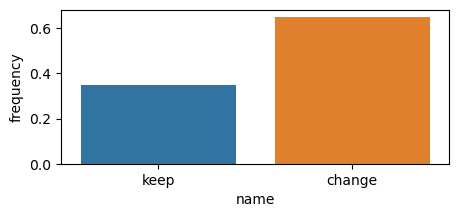

In [30]:
# для одного эксперимента co 100 подбрасываниями
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cnt = 100
#cnt = int(input('введите кол-во подбрасываний: '))

dct = monty_hall(cnt)
x1, y1 = dct.keys(), dct.values()

df = pd.DataFrame({'name': x1, 'frequency': y1})

plt.figure(figsize=(5, 2))
sns.barplot(df, x='name', y='frequency')
plt.show()

### Теория
#### вероятность выигрыша, если сменить дверь:
p = 2/3

#### вероятность выигрыша, если дверь не менять: 

p = 1/3 

### Проверим соотносится ли теория с практикой:

**ур. значимости** = 0.05

---
- Меняем дверь:  

H0: p выигрыша, если сменить дверь = 2/3

H1: p выигрыша, если сменить дверь != 2/3

---
-  Не меняем дверь:  

H0: p выигрыша, если не менять дверь = 1/3

H1: p выигрыша, если не менять дверь != 1/3


In [31]:
df = df.set_index(df.name).drop('name', axis=1)
df

,frequency
name,
keep,0.35
change,0.65


In [32]:
# Меняем дверь
from scipy import stats

p_change = 2 / 3 
Z_change =  (df.loc['change', 'frequency'] - p_change) / (p_change * (1 - p_change) / cnt)**0.5

p_value_change = 2 * (1 - stats.norm.cdf(np.abs(Z_change)))

print('p_value_change =',p_value_change)
print('Z_change =', Z_change)
print() 

if abs(p_value_change) >= 0.05:
    print('Принимаем нулевую гипотезу, вероятность при изменении выбора = 2/3')
else:
    print('отвергаем нулевую гипотезу, вероятность при изменении выбора != 2/3')

p_value_change = 0.723673609831764
Z_change = -0.3535533905932725

Принимаем нулевую гипотезу, вероятность при изменении выбора = 2/3


In [33]:
# Не меняем дверь
from scipy import stats

p_keep = 1 / 3
Z_keep =  (df.loc['keep', 'frequency'] - p_keep) / (p_keep * (1 - p_keep) / cnt)**0.5

p_value_keep = 2 * (1 - stats.norm.cdf(np.abs(Z_keep)))

print('p_value_keep =',p_value_keep)
print('Z_keep =', Z_keep)
print()

if abs(p_value_keep) >= 0.05:
    print('Принимаем нулевую гипотезу, вероятность, если не менять выбор = 1/3')
else:
    print('отвергаем нулевую гипотезу, вероятность при неизменности выбора != 1/3')

p_value_keep = 0.7236736098317631
Z_keep = 0.3535533905932737

Принимаем нулевую гипотезу, вероятность, если не менять выбор = 1/3


--- 




# Центральная предельная теорема


In [65]:
# создаем таблицу для n экспериментов
import pandas as pd
from tqdm import tqdm
n = int(input('введите колличество экспериментов: '))
df0 = pd.DataFrame({'change': [], 'keep' : []})
for _ in tqdm(range(n)):
    df0 = pd.concat([df0, pd.DataFrame([monty_hall()])], axis=0)

введите колличество экспериментов: 100


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 440.79it/s]


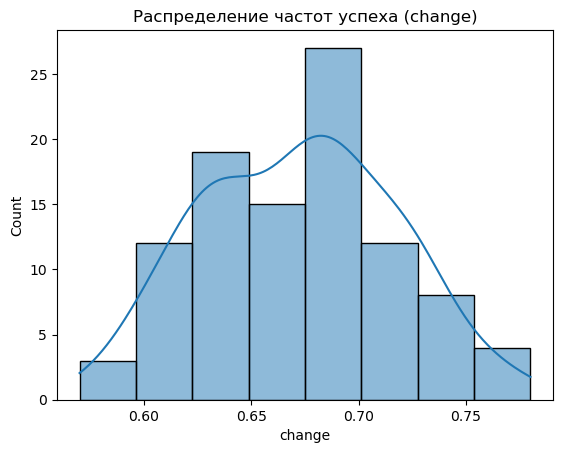

In [98]:
# построим график распределения для удавшихся экспериментов, где меняли дверь
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df0.change, kde=True)
plt.title("Распределение частот успеха (change)")
plt.show()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

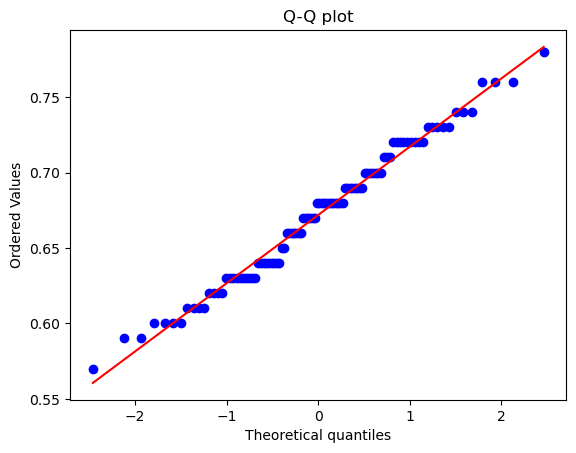

In [79]:
stats.probplot(df0.change, plot=plt)
plt.title("Q-Q plot")
plt.show()

In [80]:
from scipy import stats

stats.shapiro(df0.change)

ShapiroResult(statistic=0.9835020303726196, pvalue=0.24648307263851166)

принимаем гипотезу о нормальности

**для 5000 экспериментов:**

In [116]:
n = int(input('введите колличество экспериментов: '))
df1 = pd.DataFrame({'change': [], 'keep' : []})
for _ in tqdm(range(n)):
    df1 = pd.concat([df1, pd.DataFrame([monty_hall()])], axis=0)

введите колличество экспериментов: 5000


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 462.63it/s]


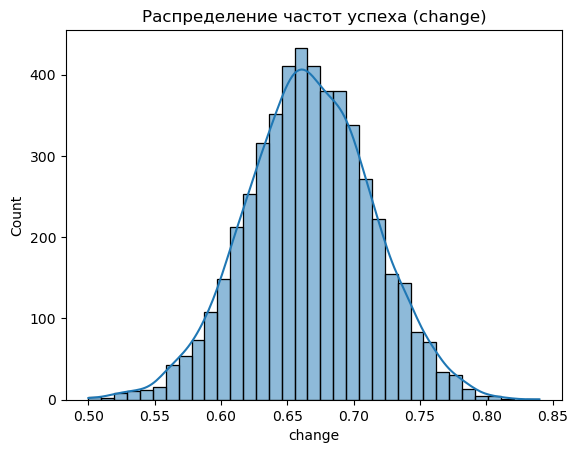

In [119]:
sns.histplot(df1.change, kde=True, bins=35)
plt.title("Распределение частот успеха (change)")
plt.show()


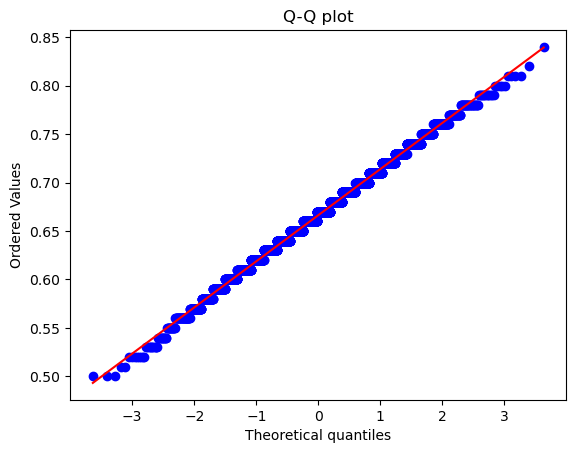

In [120]:
stats.probplot(df1.change, plot=plt)
plt.title("Q-Q plot")
plt.show()

#### Таким образом можно сделать вывод о том, что распределение средних выборочных стремится к норальному распределению при большом количестве выборок